In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Import the requests library.
import requests

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be60b321dbc4a339efdcd2e1cebb1f02


In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | nalut
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | san quintin
Processing Record 11 of Set 1 | bathsheba
Processing Record 12 of Set 1 | marcona
City not found. Skipping...
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | ayr
Processing Record 15 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1

Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | havre-saint-pierre
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | hermanus
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | turukhansk
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | bolu
Processing Record 50 of Set 4 | rypefjord
Processing Record 1 of Set 5 | skalistyy
City not found. Skipping...
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | shache
Processing Record 4 of Set 5 | barbar
City not found. Skipping...
Processing Record 5 of Set 5 | khalandritsa
City not found. Skipping...
Processing Record 6 of Set 5 | ulladulla
Processing Record 7 of Set 5 | heihe
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Set 5 | bengkulu
Processing Record 

Processing Record 23 of Set 8 | kulhudhuffushi
Processing Record 24 of Set 8 | geraldton
Processing Record 25 of Set 8 | mchinji
Processing Record 26 of Set 8 | itapuranga
Processing Record 27 of Set 8 | lasa
Processing Record 28 of Set 8 | miandrivazo
Processing Record 29 of Set 8 | mus
Processing Record 30 of Set 8 | hlotse
Processing Record 31 of Set 8 | navolato
Processing Record 32 of Set 8 | sur
Processing Record 33 of Set 8 | bulalacao
Processing Record 34 of Set 8 | san-pedro
Processing Record 35 of Set 8 | tlahualilo
City not found. Skipping...
Processing Record 36 of Set 8 | tangara
Processing Record 37 of Set 8 | palmer
Processing Record 38 of Set 8 | chokurdakh
Processing Record 39 of Set 8 | tandalti
Processing Record 40 of Set 8 | port macquarie
Processing Record 41 of Set 8 | qaqortoq
Processing Record 42 of Set 8 | bolshoy lug
Processing Record 43 of Set 8 | madaba
Processing Record 44 of Set 8 | douglas
Processing Record 45 of Set 8 | mbabane
Processing Record 46 of Se

Processing Record 9 of Set 12 | nuuk
Processing Record 10 of Set 12 | winnemucca
Processing Record 11 of Set 12 | vestmannaeyjar
Processing Record 12 of Set 12 | el dorado
Processing Record 13 of Set 12 | port blair
Processing Record 14 of Set 12 | blagoyevo
Processing Record 15 of Set 12 | pahrump
Processing Record 16 of Set 12 | marechal deodoro
Processing Record 17 of Set 12 | andenes
Processing Record 18 of Set 12 | bukachacha
Processing Record 19 of Set 12 | kasongo-lunda
Processing Record 20 of Set 12 | kangaba
Processing Record 21 of Set 12 | sept-iles
Processing Record 22 of Set 12 | kloulklubed
Processing Record 23 of Set 12 | sabang
Processing Record 24 of Set 12 | manokwari
Processing Record 25 of Set 12 | jaque
Processing Record 26 of Set 12 | scottsbluff
Processing Record 27 of Set 12 | kibuye
Processing Record 28 of Set 12 | luebo
Processing Record 29 of Set 12 | ampanihy
Processing Record 30 of Set 12 | sisimiut
Processing Record 31 of Set 12 | sao sebastiao
Processing R

In [21]:
len(city_data)

585

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.91,79,97,18.66,PF,2021-05-24 22:52:23
1,Nalut,30.3333,10.8500,85.87,22,96,12.35,LY,2021-05-24 22:52:23
2,Sao Filipe,14.8961,-24.4956,72.59,79,3,10.92,CV,2021-05-24 22:52:24
3,Klaksvik,62.2266,-6.5890,47.32,91,69,14.99,FO,2021-05-24 22:52:24
4,Sao Joao Da Barra,-21.6403,-41.0511,71.74,67,100,13.62,BR,2021-05-24 22:52:24
5,Punta Arenas,-53.1500,-70.9167,33.91,69,20,24.05,CL,2021-05-24 22:47:43
6,Tuktoyaktuk,69.4541,-133.0374,32.00,93,90,8.05,CA,2021-05-24 22:52:25
7,San Quintin,30.4833,-115.9500,68.90,61,3,15.39,MX,2021-05-24 22:52:26
8,Bathsheba,13.2167,-59.5167,81.21,73,40,18.05,BB,2021-05-24 22:52:26
9,Port Lincoln,-34.7333,135.8667,57.45,70,42,28.16,AU,2021-05-24 22:52:26


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_reordered = city_data_df[new_column_order]
city_data_reordered.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-05-24 22:52:23,-23.1203,-134.9692,76.91,79,97,18.66
1,Nalut,LY,2021-05-24 22:52:23,30.3333,10.8500,85.87,22,96,12.35
2,Sao Filipe,CV,2021-05-24 22:52:24,14.8961,-24.4956,72.59,79,3,10.92
3,Klaksvik,FO,2021-05-24 22:52:24,62.2266,-6.5890,47.32,91,69,14.99
4,Sao Joao Da Barra,BR,2021-05-24 22:52:24,-21.6403,-41.0511,71.74,67,100,13.62
5,Punta Arenas,CL,2021-05-24 22:47:43,-53.1500,-70.9167,33.91,69,20,24.05
6,Tuktoyaktuk,CA,2021-05-24 22:52:25,69.4541,-133.0374,32.00,93,90,8.05
7,San Quintin,MX,2021-05-24 22:52:26,30.4833,-115.9500,68.90,61,3,15.39
8,Bathsheba,BB,2021-05-24 22:52:26,13.2167,-59.5167,81.21,73,40,18.05
9,Port Lincoln,AU,2021-05-24 22:52:26,-34.7333,135.8667,57.45,70,42,28.16


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/24/21'

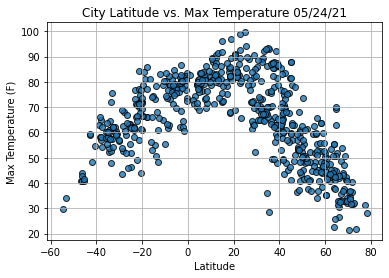

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

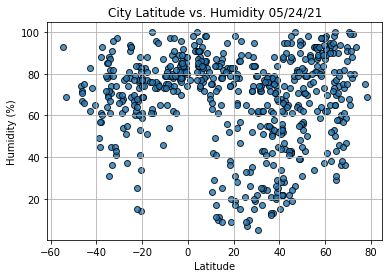

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

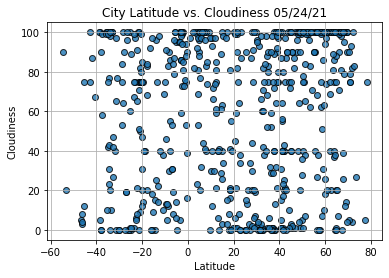

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

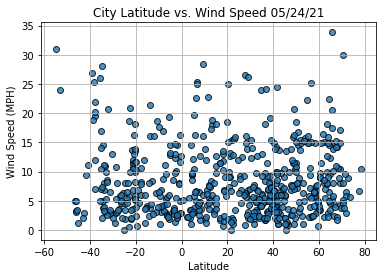

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()